Nama  : Aditya Atadewa  
Kelas : TI 3G  
NIM   : 2341720174  
Absen : 01  

# Tugas



## 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).


### Load dataset (digits) dan persiapan

In [1]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

print("X.shape =", X.shape)
print("y.shape =", y.shape)

X.shape = (1797, 64)
y.shape = (1797,)


### 1 contoh digit (visualisasi):

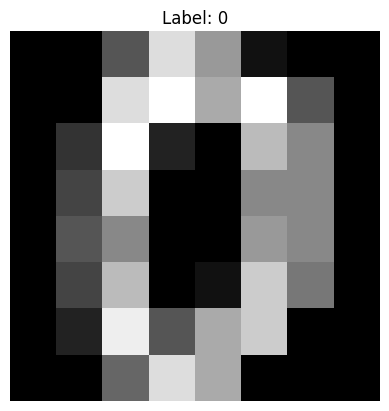

In [2]:
plt.imshow(digits.images[0], cmap='gray'); plt.title(f"Label: {y[0]}"); plt.axis('off'); plt.show()

## 2. Lakukan clustering dengan HDBSCAN.

In [3]:
try:
  import hdbscan
except ImportError:
  raise ImportError("hdbscan belum terinstal. Jalankan: pip install hdbscan")

clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(X)

hdbscan_labels = clusterer.labels_
hdbscan_probabilities = getattr(clusterer, "probabilities_", np.ones(len(hdbscan_labels)))

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

    

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

labels = hdbscan_labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int(np.sum(labels == -1))

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)
print("Unique labels (termasuk -1 untuk noise):", sorted(set(labels)))

Jumlah cluster terbentuk: 10
Jumlah noise: 923
Unique labels (termasuk -1 untuk noise): [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


### Reduksi dimensi menggunakan t-SNE ke 2D


In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto").fit_transform(X)

### Plot hasil clustering HDBSCAN

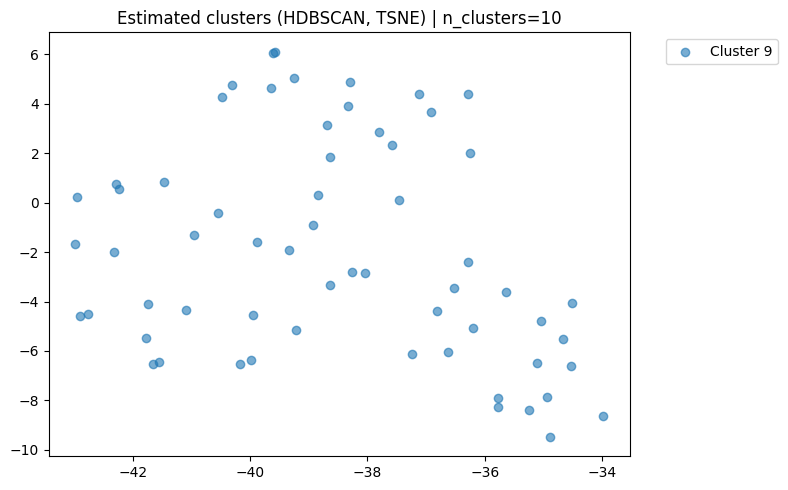

In [6]:
plt.figure(figsize=(8,5))
unique = sorted(set(hdbscan_labels))
for k in unique:
  mask = (hdbscan_labels == k)
if k == -1:
  plt.scatter(X_tsne[mask,0], X_tsne[mask,1], marker='x', label='Noise', alpha=0.7)
else:
  plt.scatter(X_tsne[mask,0], X_tsne[mask,1], marker='o', label=f"Cluster {k}", alpha=0.6)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title(f"Estimated clusters (HDBSCAN, TSNE) | n_clusters={len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}")
plt.tight_layout()
plt.show()

### Plot ground-truth labels

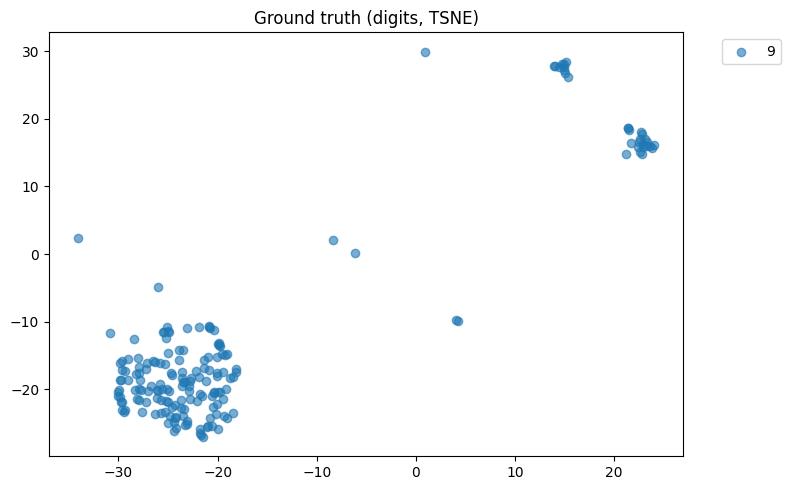

In [7]:
plt.figure(figsize=(8,5))
unique_gt = sorted(set(y))
for k in unique_gt:
  mask = (y == k)
plt.scatter(X_tsne[mask,0], X_tsne[mask,1], marker='o', label=str(k), alpha=0.6)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title("Ground truth (digits, TSNE)")
plt.tight_layout()
plt.show()

## 4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [8]:
def simple_plot(X2, labels2, title=None, label_names=None):
    import matplotlib.pyplot as plt
    unique = sorted(set(labels2))
    plt.figure(figsize=(8,5))
    for k in unique:
        mask = (labels2 == k)
        if k == -1:
            plt.scatter(X2[mask,0], X2[mask,1], marker='x', label='Noise', alpha=0.7)
        else:
            lab = (label_names[k] if (label_names is not None and k < len(label_names)) else str(k))
            plt.scatter(X2[mask,0], X2[mask,1], marker='o', label=lab, alpha=0.6)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()


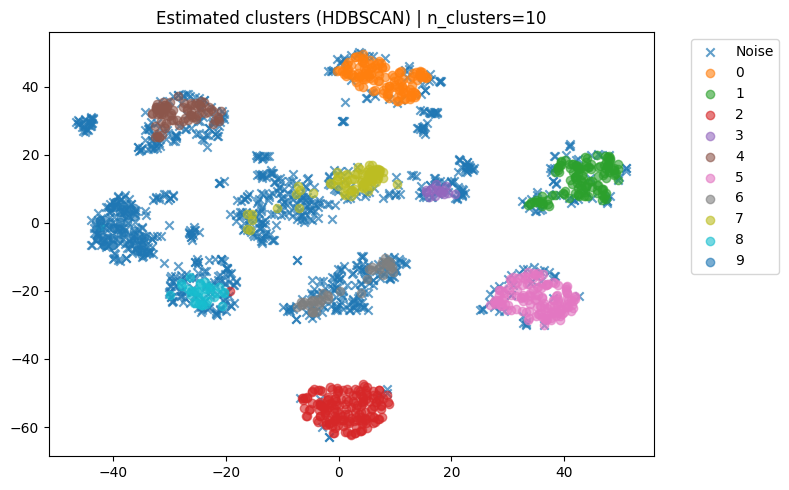

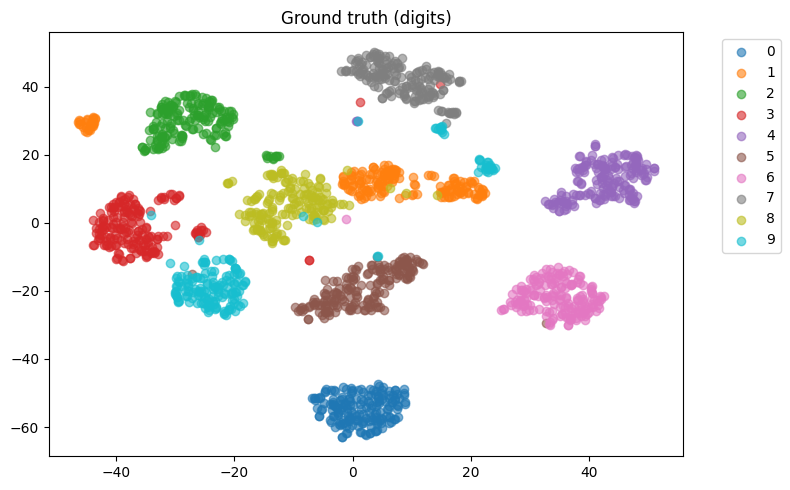

Adjusted Rand Index (ARI): 0.20642131403248337
Normalized Mutual Information (NMI): 0.5866541959065134

Confusion matrix shape: (11, 11)
Confusion matrix (rows=true labels 0..9, cols=cluster labels sorted):

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0 170   0   0   0   0   0   0   0]
 [ 99   0   0   0  16   0   0   0  67   0   0]
 [100   0   0   0   0  77   0   0   0   0   0]
 [121   0   0   0   0   0   0   0   0   1  61]
 [ 55   0 126   0   0   0   0   0   0   0   0]
 [141   0   0   0   0   0   0  41   0   0   0]
 [ 37   0   0   0   0   0 144   0   0   0   0]
 [ 53 126   0   0   0   0   0   0   0   0   0]
 [163   0   0   0   0   0   0   0  11   0   0]
 [146   0   0   1   0   0   0   0   0  33   0]]


In [9]:
# Visualisasi perbandingan
simple_plot(X_tsne, hdbscan_labels, title=f"Estimated clusters (HDBSCAN) | n_clusters={n_clusters}")

# Visualisasi ground-truth labels (digits asli)
simple_plot(X_tsne, y, title="Ground truth (digits)")

# Evaluasi dengan metrik
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

ari = adjusted_rand_score(y, hdbscan_labels)
nmi = normalized_mutual_info_score(y, hdbscan_labels)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

cm = confusion_matrix(y, hdbscan_labels, labels=sorted(set(hdbscan_labels)))
print("\nConfusion matrix shape:", cm.shape)
print("Confusion matrix (rows=true labels 0..9, cols=cluster labels sorted):\n")
print(cm)

### Analisis:
- HDBSCAN berhasil menemukan 10 klaster yang sebanding dengan jumlah kelas asli (digit 0–9), namun tidak seluruhnya sesuai.
- Terdapat cukup banyak data yang dikategorikan sebagai noise, sehingga beberapa digit tidak terklaster dengan baik.
- Beberapa digit yang berbeda tetapi mirip secara visual (misalnya 4, 7, dan 9) cenderung bercampur dalam klaster yang sama.
- Digit tertentu seperti 1, 5, dan 8 relatif lebih jelas terpisah dalam klaster.
- Nilai ARI = 0.206 menunjukkan kesesuaian hasil klastering dengan label asli cukup rendah.
- Nilai NMI = 0.586 menunjukkan adanya kesesuaian informasi pada tingkat sedang, namun belum optimal.
- Confusion matrix memperlihatkan distribusi label yang masih tersebar ke beberapa klaster, tidak hanya fokus ke satu klaster.

### Kesimpulan:

Hasil clustering HDBSCAN belum sepenuhnya sesuai dengan label asli dataset digits. Algoritma ini bisa menangkap sebagian struktur data, tetapi masih menghasilkan banyak noise dan kesalahan pemisahan antar digit.